<a href="https://colab.research.google.com/github/ArashDehghanyan/ml-practicres/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
import numpy as np

print(tf.__version__)

2.8.0


#Download and prepare CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Scaling images from range of [0, 255] to [0, 1] range
train_images, test_images = train_images / np.float32(255), test_images / np.float32(255)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0][0])

(50000, 32, 32, 3)
(50000, 1)
6


#Verify data

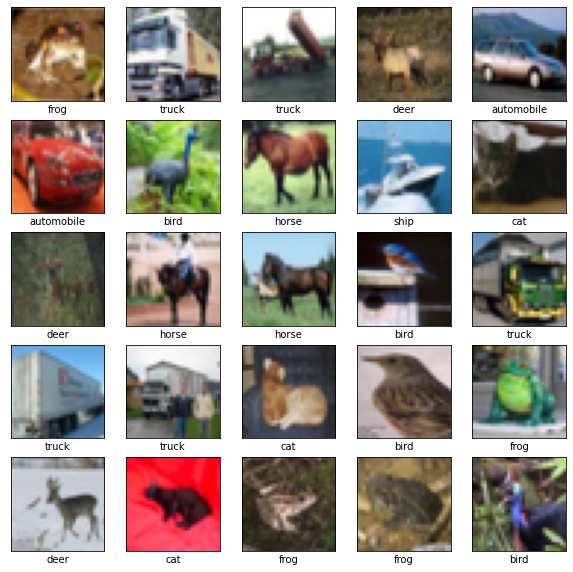

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))               
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Create convolutional layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

#Add Dense layers on top

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Complete architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#Compile and train model

In [ ]:
# Compile model
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels, epochs=10, 
          validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5404 - accuracy: 0.4357 - val_loss: 1.2483 - val_accuracy: 0.5529
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1485 - accuracy: 0.5936 - val_loss: 1.0799 - val_accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9946 - accuracy: 0.6520 - val_loss: 0.9725 - val_accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8955 - accuracy: 0.6862 - val_loss: 0.9490 - val_accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8227 - accuracy: 0.7127 - val_loss: 0.8869 - val_accuracy: 0.6912
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7646 - accuracy: 0.7322 - val_loss: 0.8570 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7140 - accuracy: 0.7500 - val_loss: 0.8665 -

#Evaluate model

313/313 - 3s - loss: 0.8685 - accuracy: 0.7142 - 3s/epoch - 9ms/step
0.7142000198364258


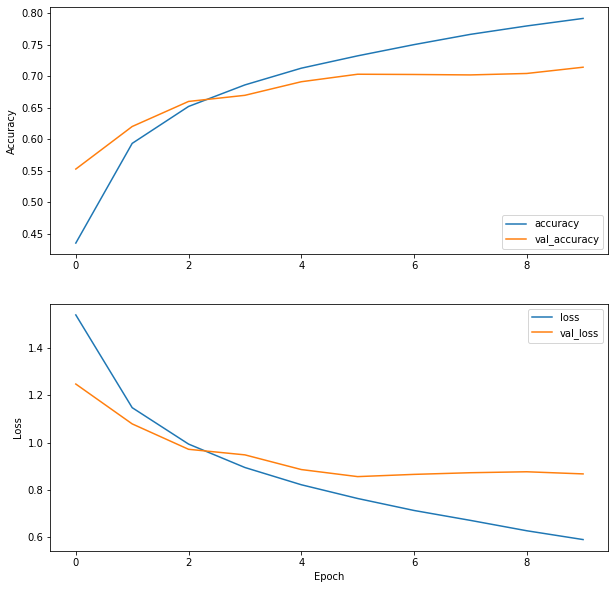

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1 , 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

#Tensorflow 2 for experts

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers, models, datasets
from matplotlib import pyplot as plt
import numpy as np
import os
import PIL

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.5


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalise pixels into range 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
batch_size = 32
BUFFER = 50000
# Build datasets using tf.data.Dataset.from_tensor_slices
# Train dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER).batch(batch_size)
# Test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

#Build your model class 

In [ ]:
class MyModel(Model):
    def __init__(self, name=None):
        super(MyModel, self).__init__(name=name)
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3))
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.conv3 = layers.Conv2D(64, (3, 3), activation='relu')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(64, activation='relu')
        self.out = layers.Dense(10)

    def call(self, inputs):
        x = self.pool1(self.conv1(inputs))
        x = self.pool2(self.conv2(x))
        x = self.flatten(x)
        return self.out(self.fc1(x))


In [ ]:
# Create an instance of the model
model = MyModel(name='my_model')

###Choose an optimiztion and loss function for training

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

# Select metrics to measure loss and accuracy of model
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


###Define train and test steps

In [ ]:
@tf.function
def train_step(images, labels):
    # Calaculate loss and gradients of network variables
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss_value = loss_object(labels, predictions)

    gradients = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss_value)
    train_accuracy(labels, predictions)


@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    loss_value = loss_object(labels, predictions)

    test_loss(loss_value)
    test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset the metrics at the start of thre next step
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

    for X, y in train_dataset:
        train_step(X, y)

    for X, y in test_dataset:
        test_step(X, y)
    
    template = f"Epoch: {epoch + 1}, Loss: {train_loss.result()}, \
    Accuracy: {train_accuracy.result()*100}%, \
    Val_loss: {test_loss.result()}, \
    Val_accuracy: {test_accuracy.result()*100}%"
    print(template)

Epoch: 1, Loss: 1.4810535907745361,     Accuracy: 47.11199951171875%,     Val_loss: 1.2154651880264282,     Val_accuracy: 56.480003356933594%
Epoch: 2, Loss: 1.127516508102417,     Accuracy: 60.46000289916992%,     Val_loss: 1.0952739715576172,     Val_accuracy: 61.189998626708984%
Epoch: 3, Loss: 1.001800775527954,     Accuracy: 65.15799713134766%,     Val_loss: 1.0059553384780884,     Val_accuracy: 64.5%
Epoch: 4, Loss: 0.9184434413909912,     Accuracy: 68.10800170898438%,     Val_loss: 0.9930910468101501,     Val_accuracy: 65.1500015258789%
Epoch: 5, Loss: 0.8504313826560974,     Accuracy: 70.49600219726562%,     Val_loss: 0.9124390482902527,     Val_accuracy: 68.40999603271484%


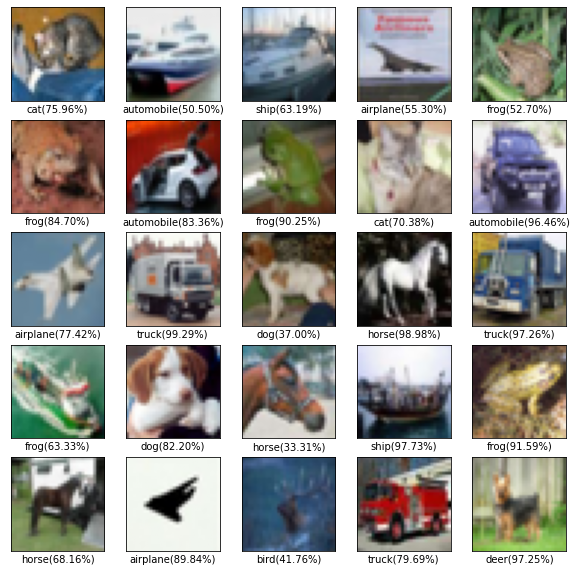

In [ ]:
plt.figure(figsize=(10, 10))
pred = model(test_images, training=False)
prob = tf.nn.softmax(pred)
class_names = class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[tf.argmax(prob[i])] + '({:3.2f}%)'.format(100 * prob[i][tf.argmax(prob[i])]))

plt.show()

#**Image Classification**

In [2]:
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.5


##Download the Dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(fname='flower_photos', origin=dataset_url, untar=True)
data_dir

228827136/228813984 [==============================] - 2s 0us/step


'/root/.keras/datasets/flower_photos'

In [4]:
type(data_dir)

str

In [5]:
data_dir = pathlib.Path(data_dir)
print(type(data_dir))
print(data_dir)

<class 'pathlib.PosixPath'>
/root/.keras/datasets/flower_photos


In [6]:
# Total images count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


<class 'pathlib.PosixPath'>
/root/.keras/datasets/flower_photos/roses/9216321995_83df405ea9.jpg


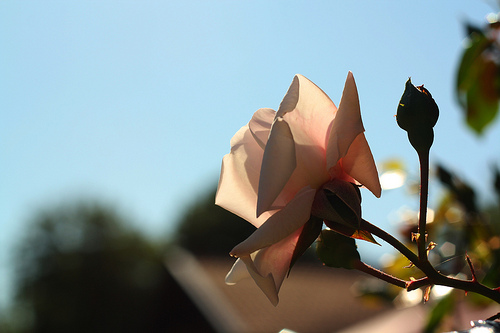

In [8]:
# Sample roses
roses = list(data_dir.glob("roses/*"))
print(type(roses[0]))
print(roses[0])
PIL.Image.open(str(roses[0]))

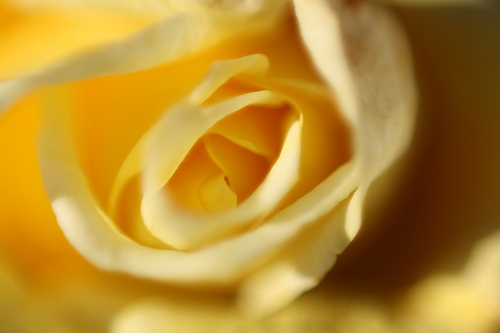

In [9]:
PIL.Image.open(str(roses[1]))

In [20]:
# Present directoy files and folders
for p in list(data_dir.glob("*")):
    print(str(p).split('/')[-1])

LICENSE.txt
tulips
dandelion
roses
sunflowers
daisy


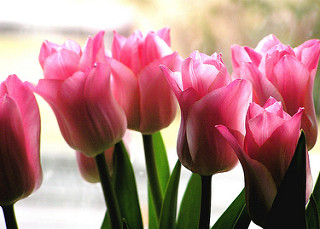

In [21]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

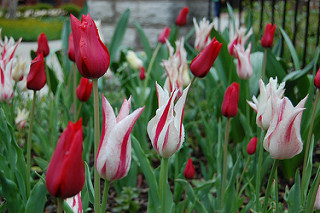

In [22]:
PIL.Image.open(str(tulips[1]))